## Mt_cars_dataset


As part of the project, we will utilize the mtcars dataset. To facilitate our analysis, we will begin by importing essential Python libraries.



In this notebook, I will delve into the intricacies of multiple linear regression, building upon the foundational understanding of simple linear regression. We explore how to fit a model using sklearn, taking into account multiple predictor variables to predict a response variable. Additionally, we introduce the mtcars dataset, a classic dataset in statistics, to illustrate the concepts in a practical context.

I'll start by importing the required dependencies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Next I will load the data into the Pandas Dataframe using pd alias from the Pandas Library. This dataset contains data from the 1974 US Motor Trend magazine, which comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles extracted from the Explore AI Academy repository.

In [2]:
#read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/regression_sprint/mtcars.csv', index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


#### mpg:
Miles/(US) gallon - Fuel efficiency measured in miles per gallon.
#### cyl: 
Number of cylinders - The number of cylinders in the engine.
#### disp: 
Displacement - Engine displacement, measured in cubic inches.
#### hp:
Gross horsepower - The power output of the engine.
#### drat: 
Rear axle ratio - The ratio of the number of teeth on the ring gear in the rear axle to the number of teeth on the pinion gear.
#### wt:
Weight - The weight of the car, measured in thousands of pounds.
#### qsec: 
1/4 mile time - The time taken to complete a quarter-mile run from a standing start.
#### vs: 
Engine type - A categorical variable indicating whether the engine is a V-shaped (0) or straight (1) configuration.
#### am: 
Transmission type - A categorical variable indicating whether the transmission is automatic (0) or manual (1).
#### gear: 
Number of forward gears - The number of gears in the transmission.
#### carb: 
Number of carburetors - The number of carburetors in the engine.

In [3]:
#Explore the shape of the dataset
df.shape

(32, 11)

In [4]:
import IPython

As we can see, the DataFrame contains multiple columns – 11 in total.

Simple linear regression models make use of a single predictor variable when fitting a model. While that seems easy to understand, the world is seldom as simple as that. Real problems contain multiple variables and we need to take into account as many as necessary.

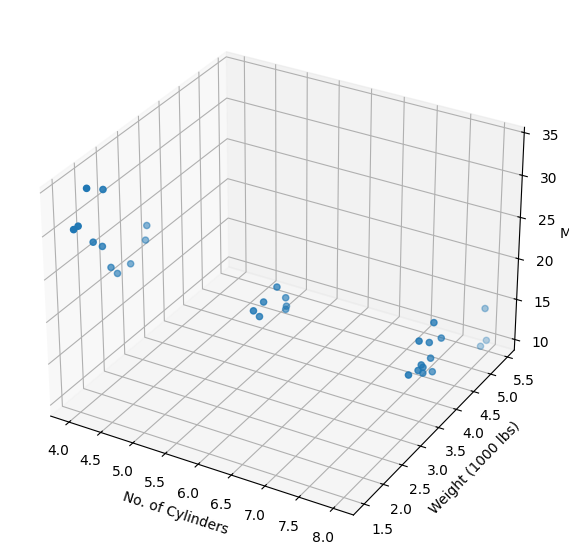

In [5]:
# create figure and 3D axes
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')

# set axis labels
ax.set_zlabel('MPG')
ax.set_xlabel('No. of Cylinders')
ax.set_ylabel('Weight (1000 lbs)')

# scatter plot with response variable and 2 predictors
ax.scatter(df['cyl'], df['wt'], df['mpg'])

This code block creates a 3D scatter plot using matplotlib. It sets up a figure with 3D axes, labels them with appropriate names ('MPG' for the z-axis, 'No. of Cylinders' for the x-axis, and 'Weight (1000 lbs)' for the y-axis), and then plots a scatter plot using three variables from the DataFrame df: 'cyl' for the x-coordinate, 'wt' for the y-coordinate, and 'mpg' for the z-coordinate. This visual representation allows for exploring the relationship between 'MPG', 'No. of Cylinders', and 'Weight' in a three-dimensional space.








# Fitting a Multivariate Regression Model

**Import Linear Regression Module:** I start by importing the LinearRegression class from scikit-learn's linear_model module. This class represents a linear regression model and allows you to perform linear regression analysis.

**Splitting Predictors and Response:**  The second part splits the DataFrame into two parts:

**Predictors (X):** This includes all columns except the 'mpg' column, which is presumably your target variable.

**Response (y):** This includes only the 'mpg' column, which is the variable you're trying to predict.

This preparation step is common when working with supervised learning algorithms in scikit-learn. Once you have X and y defined, you can proceed to train your regression model using the predictors and response variable.

In [6]:
# import regression module
from sklearn.linear_model import LinearRegression

# split predictors and response
X = df.drop(['mpg'], axis=1)
y = df['mpg']

This part  initializes a Linear Regression model object, which will be used to fit the model to the data and make predictions in your regression analysis using scikit-learn.

In [7]:
# create model object
lm = LinearRegression()

This segment imports the train/test split module from scikit-learn, which is essential for dividing the dataset into training and testing sets for evaluation of the model's performance.

In [8]:
# import train/test split module
from sklearn.model_selection import train_test_split

This segment divides the dataset into training and testing sets, allocating a portion for model training (X_train and y_train) and another for evaluation (X_test and y_test), essential for assessing the model's performance and generalization ability.








In [9]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

This line of code trains the Linear Regression model (lm) using the training data (X_train and y_train), enabling the model to learn the relationships between the predictors and the target variable for making predictions.

In [10]:
# train model
lm.fit(X_train, y_train)

LinearRegression()

This line of code extracts the intercept (or bias) term of the trained linear regression model (lm) and stores it in the variable beta_0, likely for further analysis or interpretation. Converting it to a float ensures it's in a numerical format for any subsequent calculations or presentations.

In [11]:
# extract model intercept
beta_0 = float(lm.intercept_)

This code creates a DataFrame beta_js containing the coefficients of the linear regression model (lm) for each predictor variable in X, with column names set to the predictor variable names and the coefficient values stored under the 'Coefficient' column. This allows for easy interpretation and analysis of the impact of each predictor variable on the target variable.

In [12]:
# extract model coefficients
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

This line of code prints the intercept value (beta_0) of the linear regression model. It's a way to display the constant term in the regression equation, which represents the predicted value of the target variable when all predictor variables are zero.

In [13]:
print("Intercept:", beta_0)

Intercept: 8.465282572242565



To display the coefficients of the linear regression model for each predictor variable, you can print the DataFrame beta_js

In [14]:
beta_js

,Coefficient
cyl,0.190203
disp,0.008613
hp,-0.022868
drat,1.477014
wt,-3.564785
qsec,0.924358
vs,-1.248904
am,1.340890
gear,0.482458
carb,-0.187354


The code below generates a 2x2 grid of subplots, each depicting a scatter plot of a predictor variable ('wt', 'disp', 'cyl', 'hp') against the target variable 'mpg' (miles per gallon), along with the linear regression line fitted by the model. The scatter plots illustrate the relationship between each predictor and the target variable, while the regression lines demonstrate how well the linear regression model captures these relationships. Each subplot is labeled accordingly, aiding in the interpretation of the plotted data. Finally, the layout of the subplots is adjusted for better visualization, and the figure is displayed, providing a concise overview of the relationship between predictor variables and 'mpg' as modeled by linear regression.








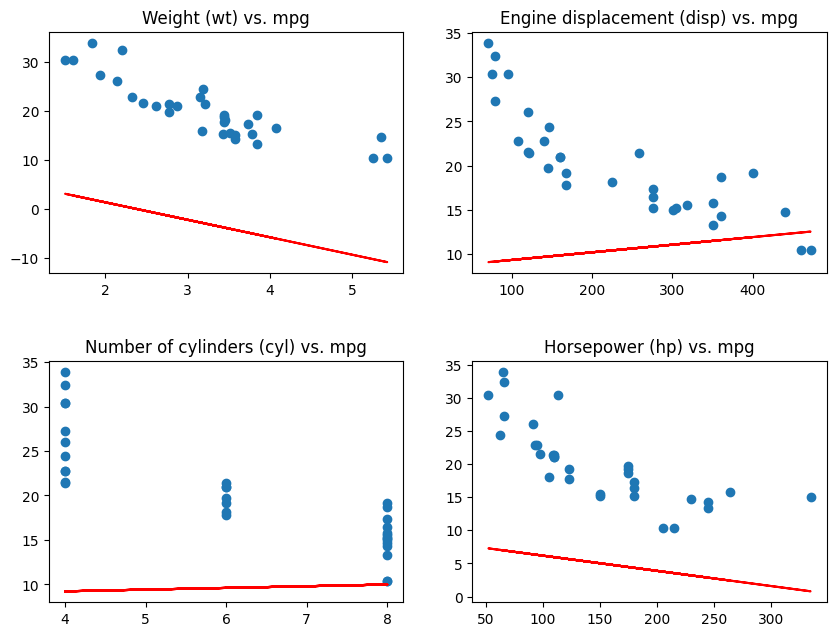

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(9,7))

axs[0,0].scatter(df['wt'], df['mpg'])
axs[0,0].plot(df['wt'], lm.intercept_ + lm.coef_[4]*df['wt'], color='red')
axs[0,0].title.set_text('Weight (wt) vs. mpg')

axs[0,1].scatter(df['disp'], df['mpg'])
axs[0,1].plot(df['disp'], lm.intercept_ + lm.coef_[1]*df['disp'], color='red')
axs[0,1].title.set_text('Engine displacement (disp) vs. mpg')

axs[1,0].scatter(df['cyl'], df['mpg'])
axs[1,0].plot(df['cyl'], lm.intercept_ + lm.coef_[0]*df['cyl'], color='red')
axs[1,0].title.set_text('Number of cylinders (cyl) vs. mpg')

axs[1,1].scatter(df['hp'], df['mpg'])
axs[1,1].plot(df['hp'], lm.intercept_ + lm.coef_[2]*df['hp'], color='red')
axs[1,1].title.set_text('Horsepower (hp) vs. mpg')

fig.tight_layout(pad=3.0)

plt.show()

It looks as if some of the predictors have been somewhat correctly modelled by the regression. Others, like disp in the top-right, are nowhere near.

Then we instantiate a new Linear Regression model (slr) and train it specifically to use the the 'disp' (engine displacement) predictor variable from the training data (X_train[['disp']]) and the corresponding target variable (y_train). This allows for a comparison between the performance of this model and the previously trained model (lm) which used all predictor variables.

In [16]:
# comparison linear model
slr = LinearRegression()

slr.fit(X_train[['disp']], y_train)

LinearRegression()

This code snippet imports the metrics module from scikit-learn, which provides various functions for evaluating the performance of machine learning models. Additionally, it imports the math module, which provides mathematical functions and constants. These modules are likely to be used for evaluating the performance of the linear regression models, such as calculating metrics like mean squared error or root mean squared error.

In [17]:
from sklearn import metrics
import math

The code below creates a dictionary (results_dict) containing the mean squared error (MSE) and root mean squared error (RMSE) for both the training and test datasets, comparing the performance of the Simple Linear Regression (SLR) model (slr) and the Multiple Linear Regression (MLR) model (lm). The MSE and RMSE values are calculated using the metrics.mean_squared_error function from scikit-learn for evaluating regression models, and the math.sqrt function for computing the square root. The results are organized into nested dictionaries for clarity and ease of access.

In [18]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['disp']])),
                        "MLR": metrics.mean_squared_error(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']])),
                        "MLR": metrics.mean_squared_error(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['disp']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

This code below creates a DataFrame (results_df) from the dictionary results_dict. Each key-value pair in the dictionary corresponds to a column in the DataFrame, where the keys represent the column names, and the values are the column values. This DataFrame organizes the evaluation results of the linear regression models, making it easier to analyze and compare their performance.

In [19]:
# create DataFrame from dictionary
results_df = pd.DataFrame(data=results_dict)

The results are printed out below:

In [20]:
results_df

,Training MSE,Test MSE,Test RMSE
SLR,8.201521,20.500165,4.527711
MLR,3.737534,11.520901,3.394245


These results compare the performance of two different regression models: Simple Linear Regression (SLR) and Multiple Linear Regression (MLR). Here's a brief explanation of each metric:

**Training MSE (Mean Squared Error):**

**SLR:** The average squared difference between the actual and predicted values on the training dataset for SLR is 8.20.

**MLR:** The average squared difference between the actual and predicted values on the training dataset for MLR is 3.74.
Lower values indicate better model performance, suggesting that MLR outperforms SLR in fitting the training data.

**Test MSE (Mean Squared Error)**

**SLR:** The average squared difference between the actual and predicted values on the test dataset for SLR is 20.50.

**MLR:** The average squared difference between the actual and predicted values on the test dataset for MLR is 11.52.

Again, lower values indicate better model performance. MLR achieves a lower test MSE compared to SLR, indicating its superior predictive accuracy on unseen data.

**Test RMSE (Root Mean Squared Error):**

**SLR:** The square root of the test MSE for SLR is 4.53.

**MLR:** The square root of the test MSE for MLR is 3.39.

**RMSE** measures the average magnitude of errors in the predicted values. 
Like **MSE**, lower values indicate better model performance. MLR's lower RMSE suggests it provides more accurate predictions compared to SLR.

In summary, the results indicate that Multiple Linear Regression (MLR) performs better than Simple Linear Regression (SLR) in terms of both training and test MSE, as well as test RMSE. This suggests that incorporating multiple predictors improves the model's predictive accuracy compared to using a single predictor.








This code snippet utilizes the Seaborn library to create a grid of boxplots, each representing a different variable from a DataFrame named df, facilitating outlier detection. The figure size is set to 20x15 inches, and a subplot grid with 4 rows and 4 columns is established. Subplots are iteratively created for each variable, including mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, and carb. Seaborn's boxplot function is employed to visualize the distribution of each variable, aiding in identifying potential outliers within the dataset. This concise and structured approach provides a comprehensive overview of the dataset's key features and outliers through visually intuitive boxplots

<Axes: ylabel='carb'>

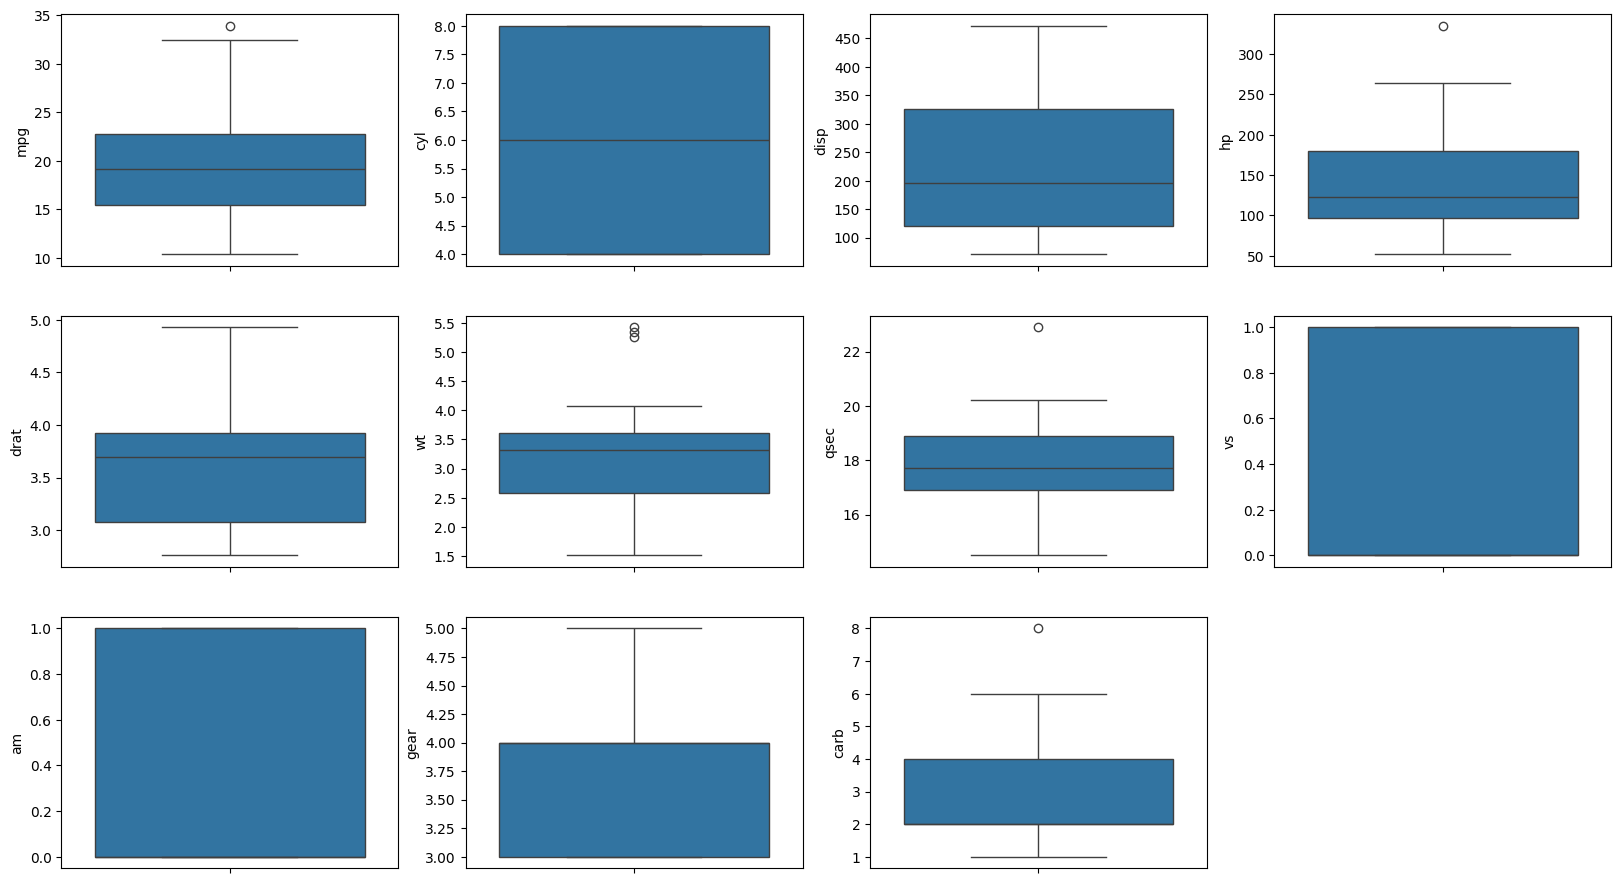

In [21]:
import seaborn as sns

# Outlier detection using boxplots 
plt.figure(figsize= (20,15))

plt.subplot(4,4,1)
sns.boxplot(df['mpg'])

plt.subplot(4,4,2)
sns.boxplot(df['cyl'])

plt.subplot(4,4,3)
sns.boxplot(df['disp'])

plt.subplot(4,4,4)
sns.boxplot(df['hp'])

plt.subplot(4,4,5)
sns.boxplot(df['drat'])

plt.subplot(4,4,6)
sns.boxplot(df['wt'])

plt.subplot(4,4,7)
sns.boxplot(df['qsec'])

plt.subplot(4,4,8)
sns.boxplot(df['vs'])

plt.subplot(4,4,9)
sns.boxplot(df['am'])
plt.subplot(4,4,10)
sns.boxplot(df['gear'])

plt.subplot(4,4,11)
sns.boxplot(df['carb'])

The features like 'wt' (weight), 'carb' (number of carburetors), 'qsec' (quarter-mile time), 'hp' (horsepower), and 'mpg' (miles per gallon) all exhibit outliers, it could imply several things:

Data Quality Issues: Outliers in multiple features may indicate potential errors or inconsistencies in data collection or recording processes. It's essential to review data collection methods and identify any potential issues to ensure data quality.

Variability in the Dataset: The presence of outliers suggests that the dataset exhibits significant variability in these features. This variability could arise from diverse factors such as different vehicle models, driving conditions, or manufacturing variations.

Impact on Analysis: Outliers can skew statistical measures and affect data analysis results. For example, in regression analysis, outliers may influence the estimated coefficients and affect the model's predictive performance.

Potential Insights: Outliers can sometimes reveal valuable insights or exceptions within the data. For instance, an outlier in 'hp' (horsepower) could indicate the presence of high-performance vehicles in the dataset, which may be of interest for further analysis or segmentation.

Need for Robust Analysis Techniques: Given the presence of outliers, it's crucial to employ robust statistical techniques that are less sensitive to extreme values. Techniques like robust regression or outlier-resistant methods can help mitigate the impact of outliers on analysis results.

Domain-Specific Considerations: Understanding the context of the data is essential for interpreting outliers accurately. In the automotive domain, for example, outliers in 'mpg' (miles per gallon) may be attributed to hybrid or electric vehicles with exceptionally high fuel efficiency.

Further Investigation: Outliers warrant further investigation to determine their nature and potential causes. It may involve examining individual data points, consulting domain experts, or conducting additional data collection to validate outliers.

In conclusion, the presence of outliers in features like 'wt', 'carb', 'qsec', 'hp', and 'mpg' highlights the need for careful data exploration, analysis, and interpretation. Addressing outliers effectively is crucial for maintaining data integrity and deriving meaningful insights from the dataset.